In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

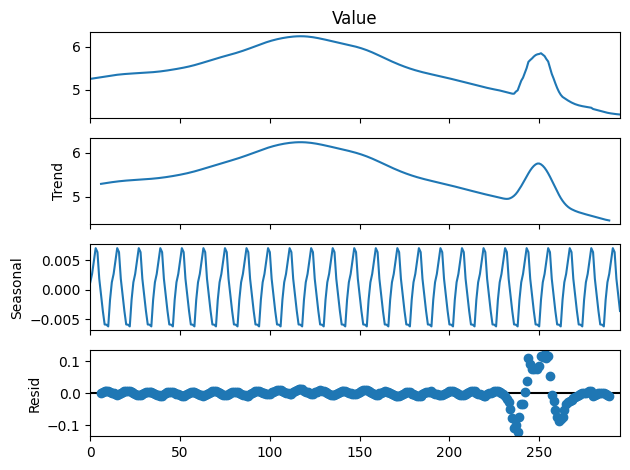

In [13]:
df = pd.read_csv('../Datasets/FRED-NROUST.csv')
series = df['Value']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

SIMPLE EXPONENTIAL

In [17]:
y_train = df['Value'].iloc[:-8]
y_test = df['Value'].iloc[-8:]

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error

c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: >

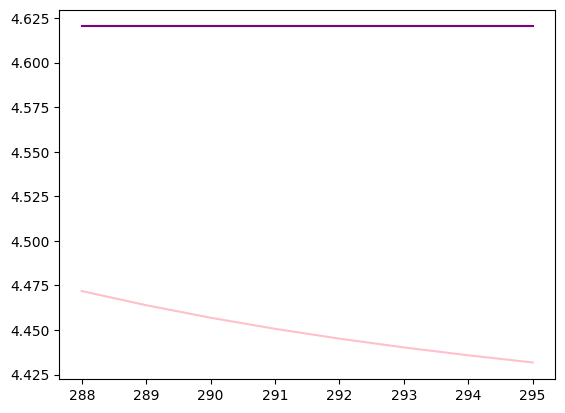

In [ ]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(color='pink')
fcast1.plot(color='purple')



HOLT LINEAR TREND

In [ ]:
from statsmodels.tsa.api import Holt
from ipywidgets import widgets
alpha = 0.8
beta  = 0.02


def holt_both(alpha, beta, val):
    holt = Holt(y_train, exponential=val)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)    
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE = {rmse:.9f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()

# widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))
widgets.interact(holt_both,alpha=(0.01,1,0.01), beta=(0.01,1,0.01), val=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, val)>